<h2><center>
# Deep Learning Course
</center></h4> <h4><center>
 <img src="http://usblogs.pwc.com/emerging-technology/wp-content/uploads/2017/07/deep-learning-900x280.png" >


# Machine Learning Excercise
</center></h4>

Developed by [Sergio Castelblanco](http://www.linkedin.com/in/sergio-castelblanco/) - [Jhon Gonzalez](http://linkedin.com/in/jhon-franklin-gonzalez-gamboa-b6123230/)

Andes University

version 2.1, June 28 2018

## Exercise 05

# Neural networks

## 4.1 Little Red Riding Hood Network

Train a neural network to solve the  Little Red Riding Hood problem in sklern and Keras. Try the neural network with different inputs and report the results.

In [1]:
#### neural network wth Sklearn MLP regresor
# Import the neccesary libraries and set a seed. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings("ignore")
%matplotlib inline
from PIL import Image
np.random.seed(22)

x1=(1,0,0)
x2=(1,1,0)
x3=(0,1,0)
x4=(0,0,1)

y1=(1,0,0)
y2=(0,0,1)
y3=(0,1,1)
y4=(0,1,0)


X=pd.DataFrame({'Big Ears':x1, 'Big Teeth':x2,'Handsome':x3,'Wrinkled':x4})

Y=pd.DataFrame({'Scream':y1, 'Hug':y2,'Food':y3,'Kiss':y4})

df = pd.DataFrame(pd.concat([X, Y], axis=1))
df

,Big Ears,Big Teeth,Handsome,Wrinkled,Scream,Hug,Food,Kiss
0,1,1,0,0,1,0,0,0
1,0,1,1,0,0,0,1,1
2,0,0,0,1,0,1,1,0


In [2]:
from sklearn import model_selection 

x=df[["Big Ears","Big Teeth","Handsome","Wrinkled"]]
y=df[["Scream","Hug","Food","Kiss"]]
xTrain,xTest,yTrain,yTest = model_selection.train_test_split(x,y,test_size=0.1,random_state=22)
xTrain
yTrain
yTest

,Scream,Hug,Food,Kiss
2,0,1,1,0


In [3]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

mlp=MLPRegressor(hidden_layer_sizes=(3), activation='logistic', solver='sgd', alpha=0.0001, 
                              batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=10000,
                              shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.99,
                              nesterovs_momentum=True, early_stopping=False,
                              validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
mlp=mlp.fit(np.array(X),np.array(Y))
y_pred= mlp.predict(np.array([[0,1,1,0]]))
print('The MSE of the model MLP Regressor is:\n',mean_squared_error(yTest, y_pred))
print(round(pd.DataFrame(y_pred),))

The MSE of the model MLP Regressor is:
 0.2274365699412774
     0    1    2    3
0  0.0  0.0  1.0  0.0


In [4]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', solver='sgd', alpha=0.0001, 
                    batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
                    max_iter=10000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                    momentum=0.9, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
mlp=clf.fit(np.array(X),np.array(Y))
y_pred= clf.predict(np.array([[0,0,0,1]]))
print(y_pred)

[[0 1 1 0]]


In [5]:
#### neural network wth Keras
import numpy as np
import pylab as pl
import keras as kr
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=3, input_dim=4))
model.add(Activation('sigmoid'))
model.add(Dense(units=4))
model.add(Activation('sigmoid'))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 16        
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.optimizers import SGD
model.compile(loss = 'binary_crossentropy',
              optimizer = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False),
              metrics = ['accuracy'])

In [7]:
model.fit(np.array(X),np.array(Y), epochs=100, verbose=2)

Epoch 1/100
 - 1s - loss: 0.7124 - acc: 0.5833
Epoch 2/100
 - 0s - loss: 0.7122 - acc: 0.5833
Epoch 3/100
 - 0s - loss: 0.7119 - acc: 0.5833
Epoch 4/100
 - 0s - loss: 0.7114 - acc: 0.5833
Epoch 5/100
 - 0s - loss: 0.7107 - acc: 0.5833
Epoch 6/100
 - 0s - loss: 0.7100 - acc: 0.5833
Epoch 7/100
 - 0s - loss: 0.7091 - acc: 0.5833
Epoch 8/100
 - 0s - loss: 0.7081 - acc: 0.5833
Epoch 9/100
 - 0s - loss: 0.7071 - acc: 0.5833
Epoch 10/100
 - 0s - loss: 0.7060 - acc: 0.5833
Epoch 11/100
 - 0s - loss: 0.7048 - acc: 0.5833
Epoch 12/100
 - 0s - loss: 0.7036 - acc: 0.5833
Epoch 13/100
 - 0s - loss: 0.7023 - acc: 0.5833
Epoch 14/100
 - 0s - loss: 0.7010 - acc: 0.5833
Epoch 15/100
 - 0s - loss: 0.6997 - acc: 0.5833
Epoch 16/100
 - 0s - loss: 0.6983 - acc: 0.5833
Epoch 17/100
 - 0s - loss: 0.6970 - acc: 0.5833
Epoch 18/100
 - 0s - loss: 0.6956 - acc: 0.5833
Epoch 19/100
 - 0s - loss: 0.6943 - acc: 0.5833
Epoch 20/100
 - 0s - loss: 0.6929 - acc: 0.5833
Epoch 21/100
 - 0s - loss: 0.6915 - acc: 0.5833
E

In [8]:
print(round(pd.DataFrame(model.predict(np.array([[1,1,0,0]]))),))

     0    1    2    3
0  0.0  0.0  1.0  0.0


## 4.2 Boston House Price Prediction

In the next questions we are going to work using the dataset *Boston*. This dataset measures the influence of socioeconomical factors on the price of several estates of the city of Boston. This dataset has 506 instances, each one characterized by 13 features:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT - % lower status of the population

Output variable:
* MEDV - Median value of owner-occupied homes in 1000's USD

**Note:** In this exercise we are going to predict the price of each estate, which is represented in the `MEDV` variable. It is important to remember that we are always aiming to predict `MEDV`, no matter which explanatory variables we are using. That means, in some cases we will use a subset of the 13 previously mentioned variables, while in other cases we will use all the 13 variables. But in no case we will change the dependent variable $y$.



1. Load the dataset using `from sklearn.datasets import load_boston`.
2. Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.
3. Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn. 
4. Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.
5. Use the function `.describe()` from Pandas for obtaining statistics about each column.


In [9]:
from sklearn.datasets import load_boston
import pandas as pd
bostonSK= load_boston()
boston= pd.DataFrame(bostonSK.data, columns=bostonSK.feature_names)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [10]:
### add the target value to dataframe
boston["MEDV"]=bostonSK.target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [11]:
## Describing Boston Dataset
round(boston.describe(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.59,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.65,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


## 4.3 Feature analysis:

Using the DataFrame generated in the previous section:
* Filter the dataset to just these features:
     * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
     * Dependent: 'MEDV'.
* Generate a scatter matrix among the features mentioned above using Pandas (`scatter_matrix`) or Seaborn (` pairplot`).
     * Do you find any relationship between the features?
* Generate the correlation matrix between these variables using `numpy.corrcoef`. Also include `MEDV`.
     * Which characteristics are more correlated?
     * BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

In [12]:
### filtering boston dataset 

filboston= boston[["LSTAT","INDUS","NOX","RM","AGE"]]
yboston=boston['MEDV']

Text(0.5,1,'Pair plot for variables')

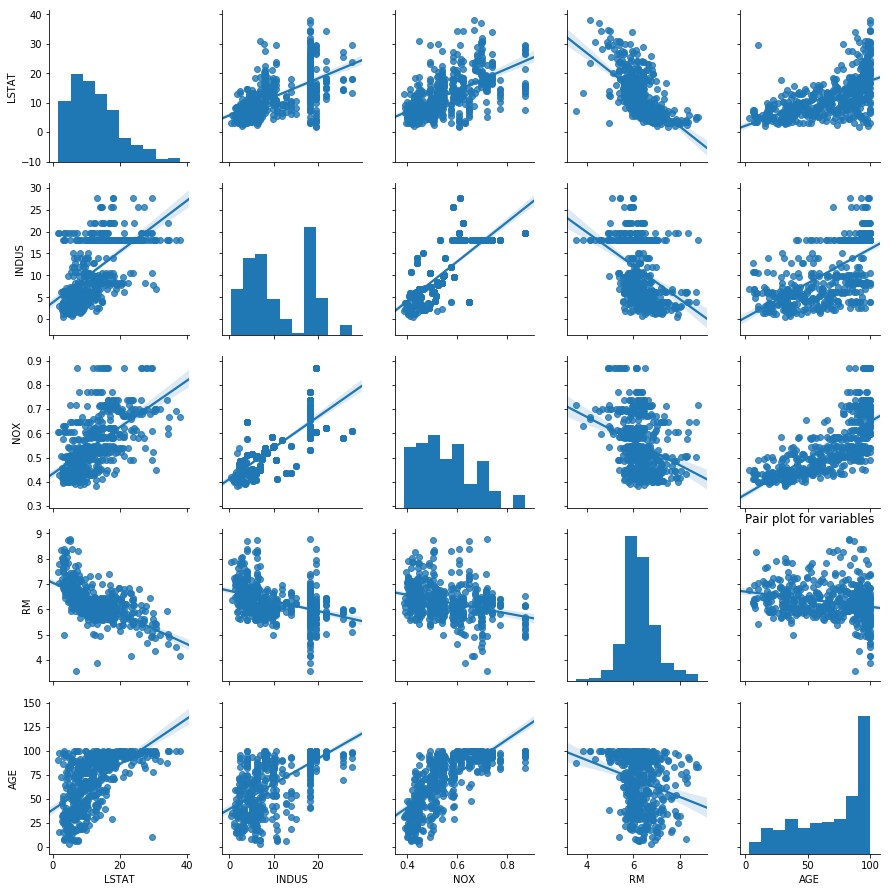

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(filboston,kind="reg",palette=127)
plt.title("Pair plot for variables")

In [14]:
import numpy as np
corre=np.corrcoef(filboston,rowvar=False)
corre
pd.DataFrame(corre,columns=("LSTAT","INDUS","NOX","RM","AGE"),index=("LSTAT","INDUS","NOX","RM","AGE"))

,LSTAT,INDUS,NOX,RM,AGE
LSTAT,1.000000,0.603800,0.590879,-0.613808,0.602339
INDUS,0.603800,1.000000,0.763651,-0.391676,0.644779
NOX,0.590879,0.763651,1.000000,-0.302188,0.731470
RM,-0.613808,-0.391676,-0.302188,1.000000,-0.240265
AGE,0.602339,0.644779,0.731470,-0.240265,1.000000


Text(0.5,1,'CORRELATION BETWEEN VARIABLES')

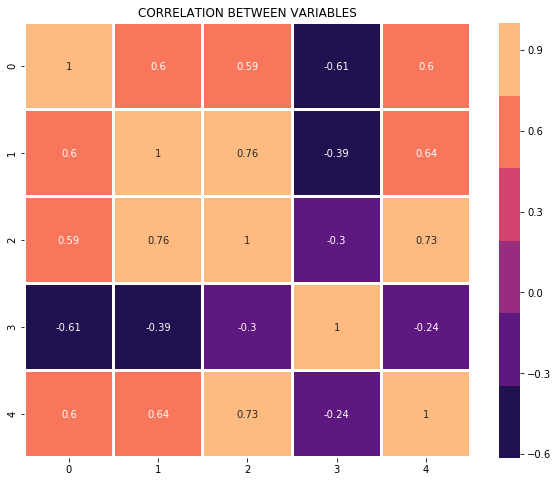

In [15]:
#### correlation matrix ####
plt.figure(figsize=(10,8))
sns.heatmap(corre,annot=True,cmap=sns.color_palette("magma"),linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")

## 4.4 Modeling linear and non linear relationships

* Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$
* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $
* Train a linear regression model on both subsets of data:
     * Report the mean square error on the test set
     * Print the values of $ w $ and $ w_0 $ of the regression equation
     * Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data
* How does the model perform on $ D_1 $ and $ D_2 $? Why?

In [16]:
from sklearn import model_selection 

X1=boston["RM"]
Y1=boston["MEDV"]

X2=boston["LSTAT"]


x1Train,x1Test,y1Train,y1Test = model_selection.train_test_split(X1,Y1,test_size=0.3,random_state=22)
x2Train,x2Test,y2Train,y2Test = model_selection.train_test_split(X2,Y1,test_size=0.3,random_state=22)

In [17]:
## Build a linear regression
from sklearn.linear_model import LinearRegression
clf1 = LinearRegression()

In [18]:
x1Train=x1Train.values.reshape(-1,1)
y1Train=y1Train.values.reshape(-1,1)

x2Train=x2Train.values.reshape(-1,1)
y2Train=y2Train.values.reshape(-1,1)

In [19]:
clf1.fit(x1Train,y1Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
print('Coefficient Beta: \n', clf1.coef_)
print('Coefficient intercept: \n', clf1.intercept_)

Coefficient Beta: 
 [[8.92652825]]
Coefficient intercept: 
 [-33.50456689]


In [21]:
clf1.fit(x2Train,y2Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
print('Coefficient Beta: \n', clf1.coef_)
print('Coefficient intercept: \n', clf1.intercept_)

Coefficient Beta: 
 [[-0.93093134]]
Coefficient intercept: 
 [34.2573108]


In [23]:
y_pred= clf1.predict(x1Test.values.reshape(-1,1))

In [24]:
y_pred2=clf1.predict(x2Test.values.reshape(-1,1))

In [25]:
 # calculate testing MSE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
print('The MSE of the model 1 is:\n',metrics.mean_squared_error(y1Test, y_pred))

The MSE of the model 1 is:
 134.6599400740832


In [26]:
print('The MSE of the model 2 is:\n',metrics.mean_squared_error(y2Test, y_pred2))

The MSE of the model 2 is:
 47.245925302142844


Text(0.5,1,'Model 1 Fitting')

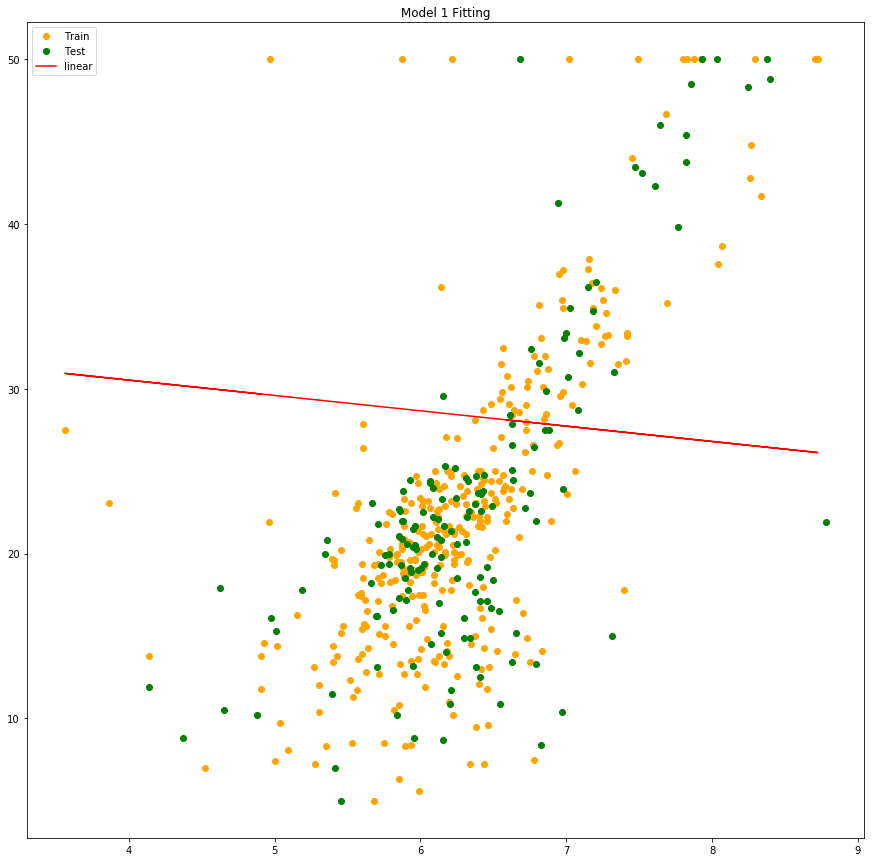

In [27]:
%matplotlib inline
### linear fit ###
plt.figure(figsize=(15,15))
plt.plot(x1Train,y1Train,"bo",label="Train",color="orange")
plt.plot(x1Test,y1Test,"bo",label="Test",color="green")
x=x1Train
bo=clf1.intercept_
b1=clf1.coef_
plt.plot(x,bo+b1*x,color="red",label="linear")
plt.xlabel=("x")
plt.ylabel=("y")
plt.legend()
plt.title("Model 1 Fitting")

Text(0.5,1,'Model 1 Fitting')

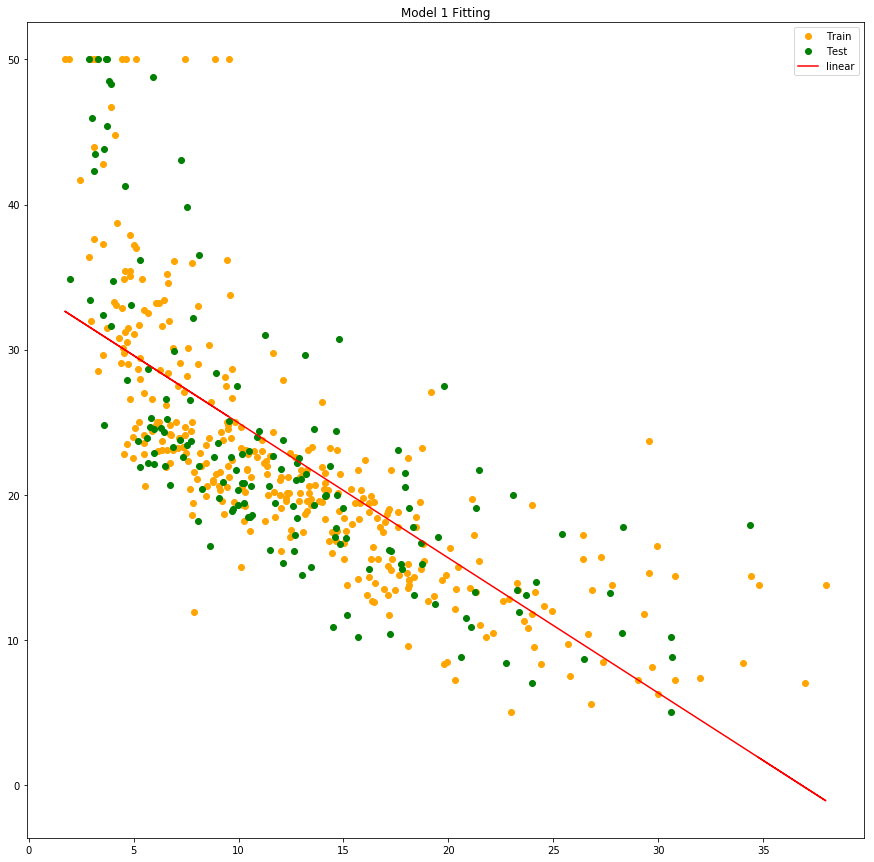

In [28]:
%matplotlib inline
### linear fit ###
plt.figure(figsize=(15,15))
plt.plot(x2Train,y2Train,"bo",label="Train",color="orange")
plt.plot(x2Test,y2Test,"bo",label="Test",color="green")
x=x2Train
bo=clf1.intercept_
b1=clf1.coef_
plt.plot(x,bo+b1*x,color="red",label="linear")
plt.xlabel=("x")
plt.ylabel=("y")
plt.legend()
plt.title("Model 1 Fitting")

## 4.5 Training a regression model

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)
* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set
* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set
* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set
     2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set
     3. Which model has better performance? Why?

In [29]:
xTrain,xTest,yTrain,yTest = model_selection.train_test_split(boston.drop("MEDV",axis=1),boston["MEDV"],test_size=0.3,random_state=22)

In [30]:
# fit linear 
clf2 = LinearRegression()

In [31]:
# predictive Model

clf2.fit(xTrain,yTrain)
y_pred3= clf2.predict(xTest)
print('The MSE of the model 3 is:\n',metrics.mean_squared_error(yTest, y_pred3))

The MSE of the model 3 is:
 23.10691890451083


In [32]:
#### MLP regressor ###
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor(hidden_layer_sizes=(128,512),max_iter=5000)
mlp=mlp.fit(xTrain,yTrain)
y_pred4= mlp.predict(xTest)
print('The MSE of the model 4 is:\n',metrics.mean_squared_error(yTest, y_pred4))

The MSE of the model 4 is:
 68.7303936993546


In [33]:
# Scaling X´s Features

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X=np.concatenate((xTrain,xTest),axis=0)
sc_x.fit(X)
X_train_s = sc_x.transform(xTrain)
X_test_s = sc_x.transform(xTest)

In [34]:
clf2 = LinearRegression()

In [35]:
# predictive Model with scale date

clf2.fit(X_train_s,yTrain)
y_pred5= clf2.predict(X_test_s)
print('The MSE of the Linear Regression model is:\n',metrics.mean_squared_error(yTest, y_pred5))

The MSE of the Linear Regression model is:
 23.10691890451086


In [36]:
mlp=MLPRegressor(hidden_layer_sizes=(128,512),max_iter=5000)
mlp=mlp.fit(X_train_s,yTrain)
y_pred6= mlp.predict(X_test_s)
print('The MSE of the MLP Model is:\n',metrics.mean_squared_error(yTest, y_pred6))

The MSE of the MLP Model is:
 13.39804800002829


Text(0.5,1,'SELECTION MODEL')

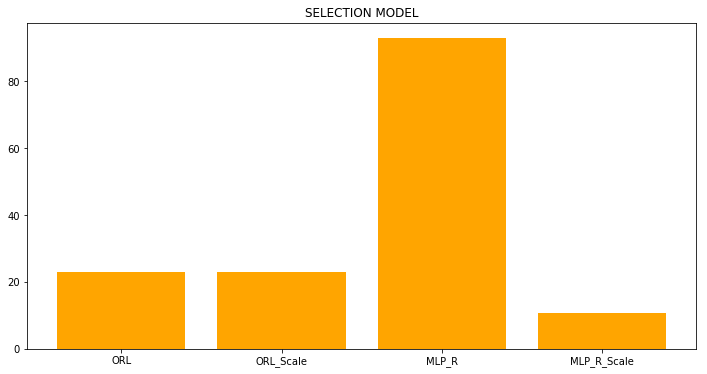

In [46]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
plt.bar(["ORL","ORL_Scale","MLP_R","MLP_R_Scale"],[23.10,23.10,92.88,10.73],color="orange",align='center')
plt.title("SELECTION MODEL")